# All the imports used in the exercises 

In [52]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # For exercise 01
from sklearn.linear_model import LinearRegression  # For exercise 02
from sklearn.metrics import mean_squared_error, r2_score  # For exercise 04, 05
import matplotlib.pyplot as plt  # For exercise 06


### -> Exercise 1: Load a dataset (e.g., the Boston Housing dataset from Scikit-Learn) and prepare the data for linear regression (e.g., split into training and testing sets).

In [53]:
''' Since load_boston() has been removed from scikit-learn since version 1.2, I will use the downloaded Boston 
    Housing Dataset and import it from local machine. '''

# Loading the dataset
boston_dataset = pd.read_csv('BostonHousing.csv')
boston_dataset.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [54]:
# Checking for missing values
boston_dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [55]:
# Printing the basic statistics of the dataset
boston_dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [56]:
# Printing the info of dataset
boston_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


-> Since there are no missing values, we can proceed to the data splitting.

In [57]:
# Defining the independent variable (X) and dependent variable (Y)
X = boston_dataset.drop('medv', axis=1)
Y = boston_dataset['medv']

# Splitting the data into training and testing sets in 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


### -> Exercise 2: Implement linear regression using Scikit-Learn. Fit the model to the training data.

In [58]:
# Implementing the Linear Regression Model
lr_model = LinearRegression()

# Fitting the  model to the training data
lr_model.fit(X_train, Y_train)

LinearRegression()


### -> Exercise 3: Predict the target variable for the test set using the fitted linear regression model.

In [59]:
# Predicting the target variable for test set
Y_pred = lr_model.predict(X_test)


### -> Exercise 4: Calculate the Mean Squared Error (MSE) of the linear regression model on the test set.

In [60]:
# Calculating the MSE of the Linear Regression model on test set
MSE = mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error on test set:', MSE)

Mean Squared Error on test set: 24.291119474973538



### -> Exercise 5: Calculate the R-squared value of the linear regression model on the test set.

In [61]:
# Calculating the R2-score of the Linear Regression model on test set
R2_score = r2_score(Y_test, Y_pred)
print('R2 score on test set:', R2_score)

R2 score on test set: 0.6687594935356317



### -> Exercise 6:  Plot the regression line along with the actual data points to visually assess the model's performance.

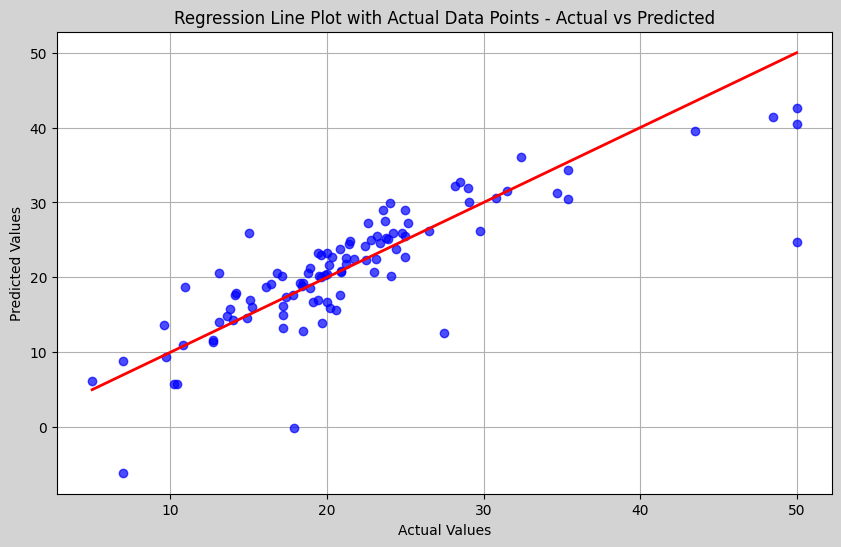

In [62]:
# Plotting the regression line along with the actual data points
plt.figure(figsize=(10, 6), facecolor='lightgray')
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.7, zorder=2)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2, zorder=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Line Plot with Actual Data Points - Actual vs Predicted')
plt.grid(True, zorder=1)
plt.show()

<p>-> From the regression line, we can see that model is performing well. Most of the data points are close to the regression line and MSE is also less. Some data points are deviated from the ideal path but most of them are closer indicating a good overall performace of the model.</p>


### -> Exercise 7:  Evaluate the model's performance by comparing the predicted values with the actual values. Create a scatter plot of the predicted vs. actual values.

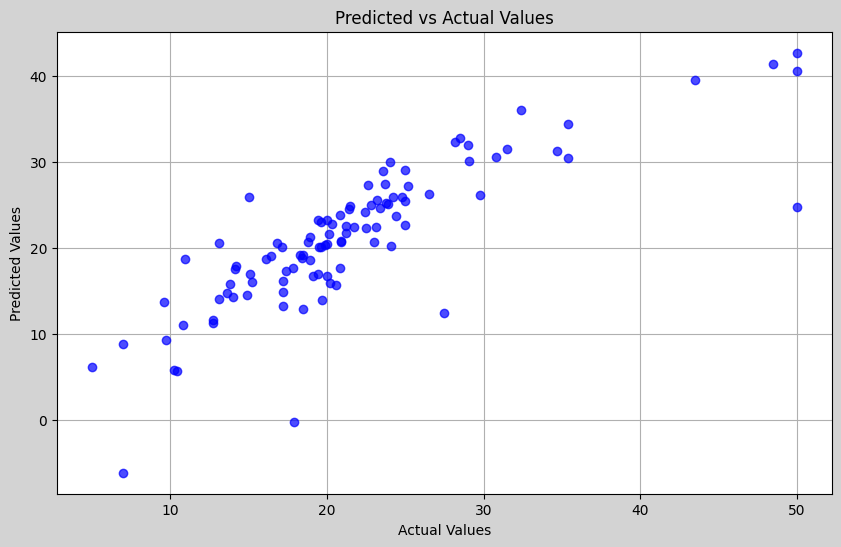

In [63]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6), facecolor='lightgray')
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.7, zorder=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.grid(True, zorder=1)
plt.show()

<p>-> From the above scatter plot, we can observe that most of the data points have positive correlation. There are some data points which are away from the ideal path but most of the predicted values have good positive correlation.</p>


### -> Exercise 8: Interpret the coefficients of the linear regression model. Explain the impact of each feature on the target variable.

In [64]:
# Interpretting the coefficients of the model
coefficients = lr_model.coef_
df_coeff = pd.DataFrame(coefficients, X.columns, columns=["Coefficient"])
df_coeff

,Coefficient
crim,-0.113056
zn,0.030110
indus,0.040381
chas,2.784438
nox,-17.202633
rm,4.438835
age,-0.006296
dis,-1.447865
rad,0.262430
tax,-0.010647


In [70]:
# Explaining the impact of each feature on the target variable
for feature in df_coeff.index:
    coef = df_coeff.loc[feature, 'Coefficient']
    impact = "increase" if coef > 0 else "decrease"
    print(f"-> A unit increase in {feature} will result in a {abs(coef):.2f} units {impact} in the target variable. (MEDV)")

-> A unit increase in crim will result in a 0.11 units decrease in the target variable. (MEDV)
-> A unit increase in zn will result in a 0.03 units increase in the target variable. (MEDV)
-> A unit increase in indus will result in a 0.04 units increase in the target variable. (MEDV)
-> A unit increase in chas will result in a 2.78 units increase in the target variable. (MEDV)
-> A unit increase in nox will result in a 17.20 units decrease in the target variable. (MEDV)
-> A unit increase in rm will result in a 4.44 units increase in the target variable. (MEDV)
-> A unit increase in age will result in a 0.01 units decrease in the target variable. (MEDV)
-> A unit increase in dis will result in a 1.45 units decrease in the target variable. (MEDV)
-> A unit increase in rad will result in a 0.26 units increase in the target variable. (MEDV)
-> A unit increase in tax will result in a 0.01 units decrease in the target variable. (MEDV)
-> A unit increase in ptratio will result in a 0.92 units

<p>--> The key point here is that if the coefficient is positive, then it will result in increasing the target variable (directly proportional). <br>
But if the coefficient is negative, it will result in decreasing the target variable (inversely proportional) </p>